In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gzip as gz
import json
import pickle
import torch

# Raw


In [2]:
with gz.open('raw/cells.json.gz', 'rt') as f:  # 'rt' means read text
    data = json.load(f)

In [3]:
data

[{'name': 'sky130_fd_sc_hs__or4b_2',
  'id': 0,
  'width': 17280,
  'height': 13320,
  'terms': [{'name': 'A', 'id': 1, 'dir': 0, 'xloc': 2110, 'yloc': 1750},
   {'name': 'B', 'id': 2, 'dir': 0, 'xloc': 2650, 'yloc': 1810},
   {'name': 'C', 'id': 3, 'dir': 0, 'xloc': 3180, 'yloc': 1995},
   {'name': 'D_N', 'id': 4, 'dir': 0, 'xloc': 337, 'yloc': 1565},
   {'name': 'X', 'id': 5, 'dir': 1, 'xloc': 1207, 'yloc': 1400},
   {'name': 'VGND', 'id': 6, 'dir': 2, 'xloc': 2160, 'yloc': 0},
   {'name': 'VNB', 'id': 7, 'dir': 2, 'xloc': 2160, 'yloc': 122},
   {'name': 'VPB', 'id': 8, 'dir': 2, 'xloc': 2160, 'yloc': 2590},
   {'name': 'VPWR', 'id': 9, 'dir': 2, 'xloc': 2160, 'yloc': 3330}]},
 {'name': 'sky130_fd_sc_hs__or4b_4',
  'id': 1,
  'width': 28800,
  'height': 13320,
  'terms': [{'name': 'A', 'id': 1, 'dir': 0, 'xloc': 1170, 'yloc': 1615},
   {'name': 'B', 'id': 2, 'dir': 0, 'xloc': 1143, 'yloc': 1341},
   {'name': 'C', 'id': 3, 'dir': 0, 'xloc': 3360, 'yloc': 1295},
   {'name': 'D_N', 'id'

In [4]:
with gz.open('raw/superblue1/superblue1.json.gz', 'rt') as f:  # 'rt' means read text
    data = json.load(f)

In [5]:
len(set([(x['xloc'], x['yloc']) for x in data['instances']]))

433

In [6]:
set([(x['xloc'], x['yloc']) for x in data['instances']])

{(0, 0),
 (12480, 59940),
 (12480, 4295700),
 (18240, 4131420),
 (20160, 3324080),
 (48960, 3076920),
 (200640, 4131420),
 (304320, 3076920),
 (312960, 3443960),
 (312960, 3563840),
 (399360, 3468380),
 (399360, 3588260),
 (416640, 3348500),
 (527040, 223480),
 (527040, 391460),
 (527040, 551300),
 (527040, 719280),
 (527040, 879120),
 (527040, 1046360),
 (527040, 1206200),
 (527040, 1374180),
 (527040, 1813740),
 (527040, 2021680),
 (527040, 2237760),
 (527040, 2444960),
 (527040, 2652900),
 (527040, 2868980),
 (527040, 4459240),
 (527040, 4627220),
 (527040, 4787060),
 (527040, 4955040),
 (527040, 5114880),
 (527040, 5282120),
 (527040, 5441960),
 (527040, 5609940),
 (527040, 6049500),
 (527040, 6257440),
 (527040, 6473520),
 (527040, 6680720),
 (527040, 6888660),
 (527040, 7104740),
 (661440, 4459240),
 (661440, 4627220),
 (661440, 4787060),
 (661440, 4955040),
 (661440, 5114880),
 (661440, 5282120),
 (661440, 5441960),
 (661440, 5609940),
 (661440, 6049500),
 (661440, 6257440),
 (6

In [7]:
len(data['instances'])

797938

In [8]:
with gz.open('raw/superblue1/1/superblue1.json.gz', 'rt') as f:  # 'rt' means read text
    data = json.load(f)

In [9]:
set([(x['xloc'], x['yloc']) for x in data['instances']])

{(6084960, 7549110),
 (4327200, 5364630),
 (1816320, 3832830),
 (759360, 4252410),
 (5978880, 3712950),
 (1156800, 6117210),
 (3171840, 5537790),
 (4921920, 4132530),
 (635040, 2207790),
 (3049920, 6716610),
 (5039040, 4338990),
 (5197440, 7176150),
 (1388160, 3812850),
 (9196800, 3346650),
 (6389760, 5171490),
 (331200, 4232430),
 (2042880, 2913750),
 (3042240, 5384610),
 (4514880, 5038290),
 (1227360, 5584410),
 (448320, 4438890),
 (9215040, 3812850),
 (2102400, 6010650),
 (5268000, 6643350),
 (1739040, 4938390),
 (7778880, 8175150),
 (1939200, 4558770),
 (4865760, 6163830),
 (1056480, 2800530),
 (2271840, 5218110),
 (4502400, 5091570),
 (719040, 3526470),
 (934560, 3979350),
 (5699520, 3959370),
 (4164960, 5817510),
 (2412000, 4505490),
 (5637600, 5471190),
 (1373760, 2627370),
 (2866560, 3986010),
 (1869600, 4738590),
 (4300320, 4232430),
 (771360, 2527470),
 (5910240, 5797530),
 (1804800, 5790870),
 (5830080, 3759570),
 (1524480, 4132530),
 (2004960, 5411250),
 (2220480, 5864130),

# Processed

In [10]:
# Path to your .pkl file
file_path = "de_hnn/data/superblue/superblue_1/node_neighbor_features.pkl"

# Open and load the file
with open(file_path, 'rb') as file:  # 'rb' mode opens the file in binary read mode
    data = pickle.load(file)

# Display the data
print(data)

{'pd': array([[0.57659997, 3.78525   , 2.84100841, ..., 0.        , 0.        ,
        0.        ],
       [1.1236587 , 2.59016081, 0.48024168, ..., 0.        , 0.        ,
        0.        ],
       [1.1236587 , 2.59016081, 0.48024168, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.95083978, 0.6301005 ,
        0.03481547],
       [0.        , 0.        , 0.        , ..., 1.14630555, 1.43355668,
        0.14265637],
       [0.        , 0.        , 0.        , ..., 1.44839475, 1.73426691,
        0.1504663 ]]), 'neighbor': array([[ 3.,  5.,  7., ...,  1.,  1.,  1.],
       [ 3., 10., 20., ...,  1.,  1.,  1.],
       [ 3., 10., 20., ...,  1.,  1.,  1.],
       ...,
       [ 1.,  1.,  1., ...,  7.,  6.,  5.],
       [ 1.,  1.,  1., ...,  7.,  9.,  8.],
       [ 1.,  1.,  1., ...,  7.,  7.,  7.]])}


In [11]:
data.keys()

dict_keys(['pd', 'neighbor'])

In [12]:
data['neighbor']

array([[ 3.,  5.,  7., ...,  1.,  1.,  1.],
       [ 3., 10., 20., ...,  1.,  1.,  1.],
       [ 3., 10., 20., ...,  1.,  1.,  1.],
       ...,
       [ 1.,  1.,  1., ...,  7.,  6.,  5.],
       [ 1.,  1.,  1., ...,  7.,  9.,  8.],
       [ 1.,  1.,  1., ...,  7.,  7.,  7.]])

In [13]:
file_path = "de_hnn/data/superblue/superblue_1/pyg_data.pkl"

# Open and load the file
with open(file_path, 'rb') as file:  # 'rb' mode opens the file in binary read mode
    data = torch.load(file)

# Display the data
print(data)

/var/folders/75/4b4y2mlx2yv_34rkxb83ydkr0000gn/T/ipykernel_95777/2892397952.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(file)


Data(node_features=[797938, 45], net_features=[821523, 11], edge_index_sink_to_net=[2, 2139097], edge_index_source_to_net=[2, 810922], node_demand=[797938], net_demand=[821523], net_hpwl=[821523], batch=[797938], num_vn=99, pos_lst=[797938, 2])


In [14]:
data.keys()

['edge_index_source_to_net',
 'batch',
 'net_hpwl',
 'net_demand',
 'num_vn',
 'net_features',
 'edge_index_sink_to_net',
 'pos_lst',
 'node_demand',
 'node_features']

In [15]:
len(data['node_features'])

797938

In [16]:
# pos_lst has phyiscal location of every cell instance
data['pos_lst'].shape

torch.Size([797938, 2])

In [17]:
np.mean([x[0] for x in data['pos_lst']])

0.57940125

In [18]:
x, y = zip(*data['pos_lst'])

In [19]:
len(x)

797938

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


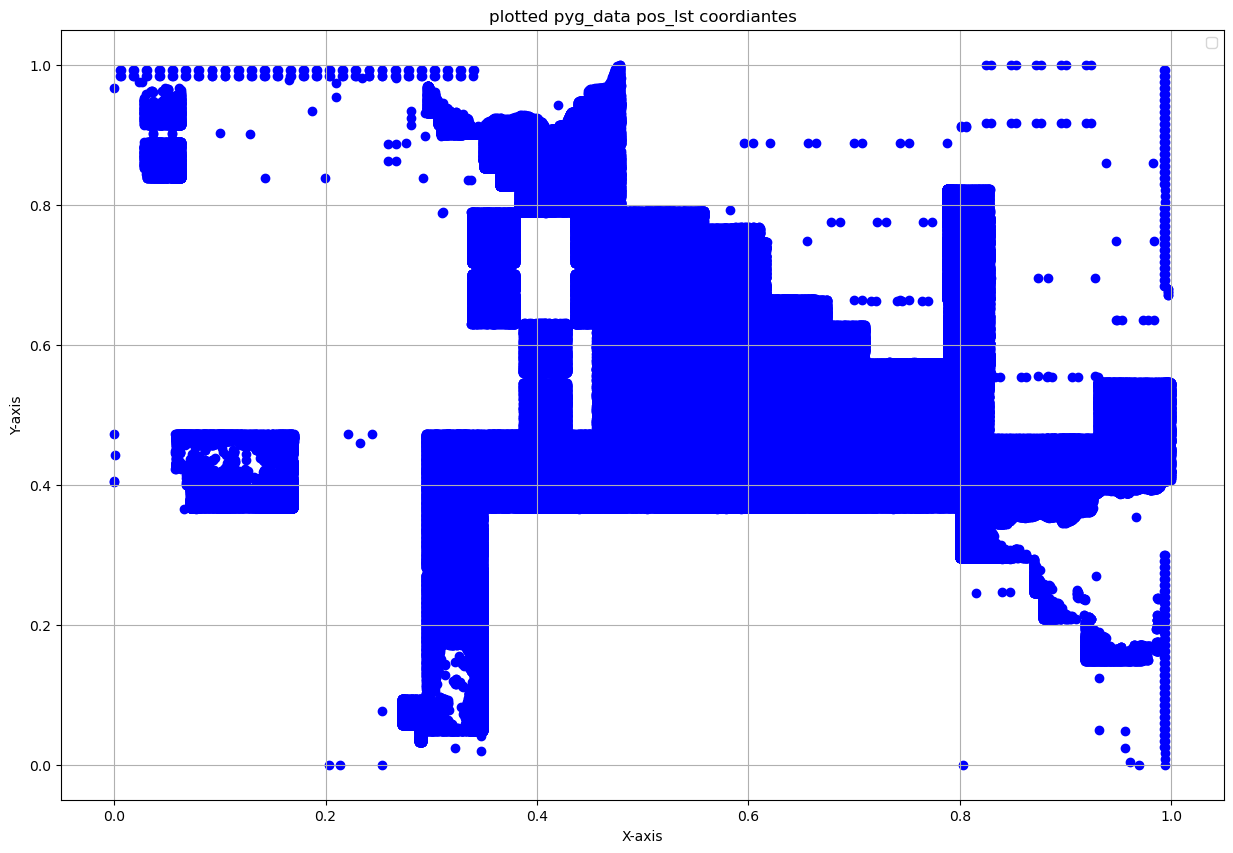

In [20]:
plt.figure(figsize=(15, 10))
plt.scatter(x, y, color='blue')

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()

# Show the grid
plt.grid(True)

# Display the plot
plt.title('plotted pyg_data pos_lst coordiantes')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


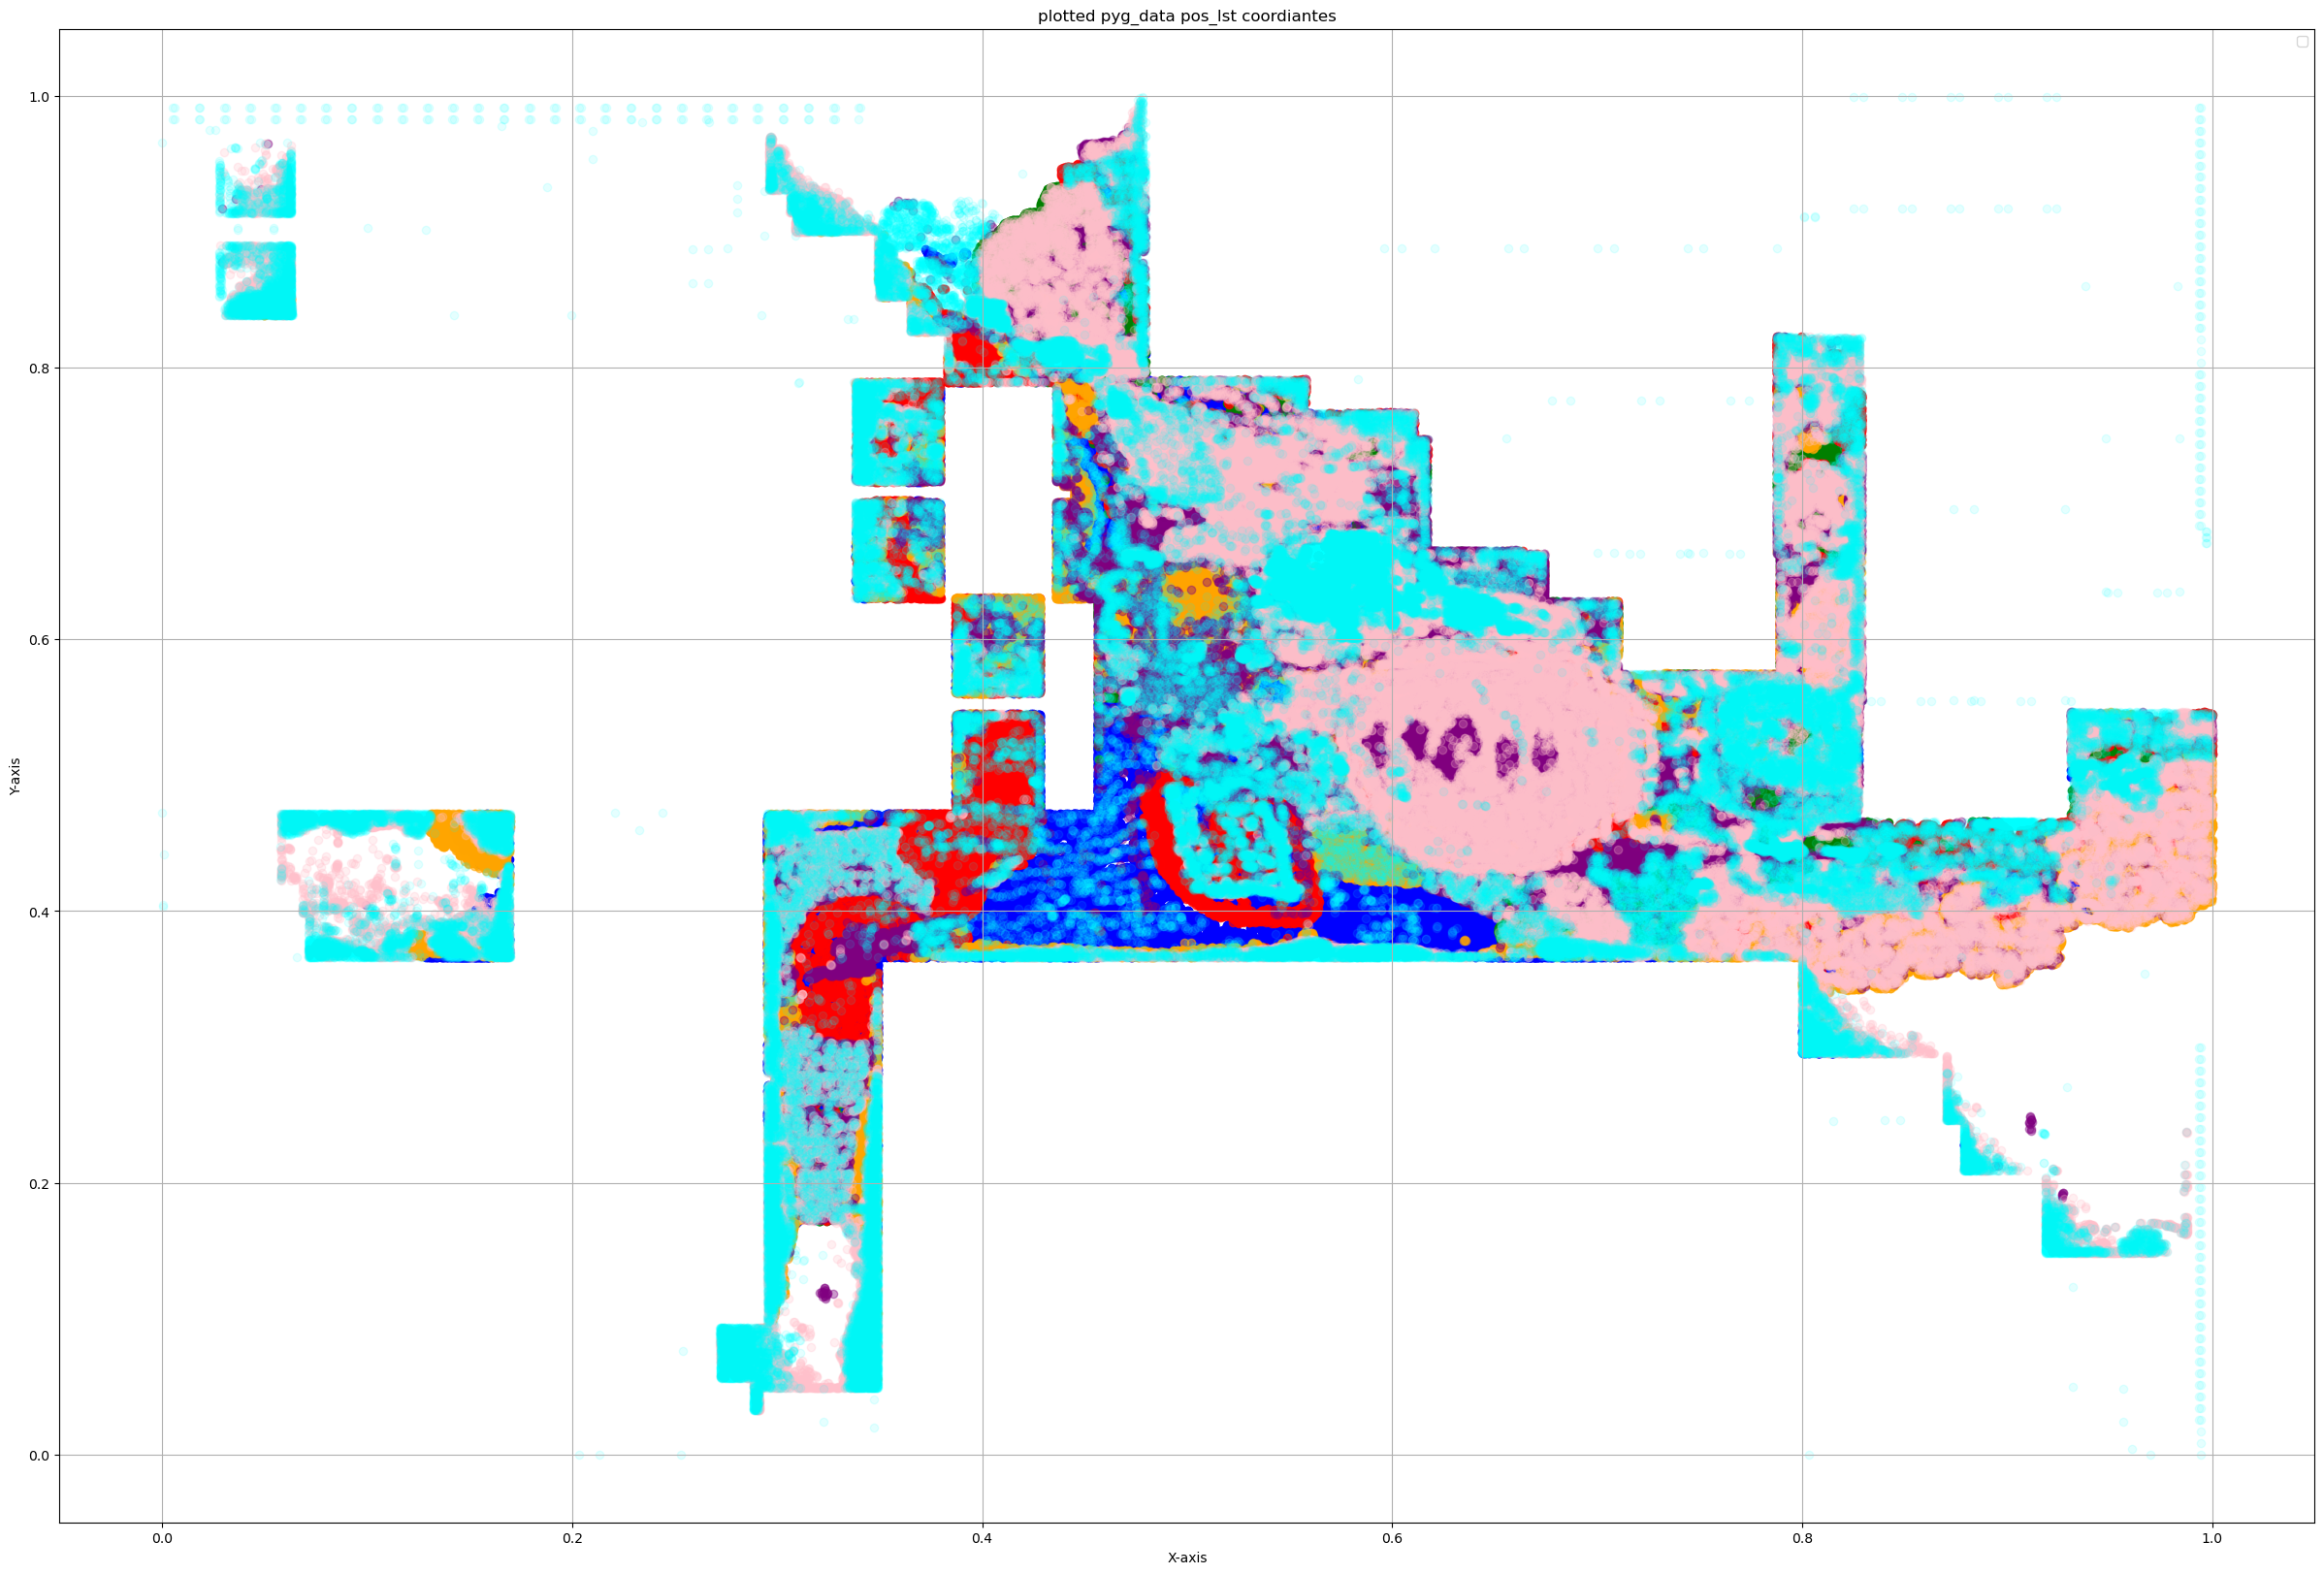

In [21]:
plt.figure(figsize=(30, 20))
plt.scatter(x[:100000], y[:100000], color='blue', alpha=1)  # Scatter plot for individual points
plt.scatter(x[100000:200000], y[100000:200000], color='green', alpha=0.85)  # Scatter plot for individual points
plt.scatter(x[200000:300000], y[200000:300000], color='red', alpha=0.7)  # Scatter plot for individual points
plt.scatter(x[300000:400000], y[300000:400000], color='orange', alpha=0.55)  # Scatter plot for individual points
plt.scatter(x[400000:500000], y[400000:500000], color='purple', alpha=0.4)  # Scatter plot for individual points
plt.scatter(x[600000:700000], y[600000:700000], color='pink', alpha=0.25)  # Scatter plot for individual points
plt.scatter(x[700000:], y[700000:], color='cyan', alpha=0.1)  # Scatter plot for individual points


# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()

# Show the grid
plt.grid(True)

# Display the plot
plt.title('plotted pyg_data pos_lst coordiantes')
plt.show()

In [22]:
print(len(data['pos_lst']))
print(len(set([(x[0], x[1]) for x in data['pos_lst']])))

797938
797938


In [23]:
a = [(1.1, 1.1), (1.1, 1.1)]

In [24]:
set(a)

{(1.1, 1.1)}

In [25]:
data.keys()

['edge_index_source_to_net',
 'batch',
 'net_hpwl',
 'net_demand',
 'num_vn',
 'net_features',
 'edge_index_sink_to_net',
 'pos_lst',
 'node_demand',
 'node_features']

In [26]:
len(data['edge_index_source_to_net'][1])

810922

In [27]:
len(data['edge_index_sink_to_net'][0])

2139097

In [28]:
# source/dest cell id (first tensor) --> net id (second tensor)
data['edge_index_source_to_net']

tensor([[ 658922,  774971,  774865,  ...,  797723,  797724,  797725],
        [ 797943,  797944,  797945,  ..., 1619458, 1619459, 1619460]])

In [29]:
# sink/origin cell id (first tensor) --> net id (second tensor)
data['edge_index_sink_to_net']

tensor([[ 478481,  478482,  478483,  ...,  738340,  797725,  738342],
        [ 797938,  797938,  797938,  ..., 1619458, 1619459, 1619460]])

In [30]:
# net IDs start from 797938
torch.max(data['edge_index_sink_to_net'][1]) - torch.min(data['edge_index_sink_to_net'][1])

tensor(821522)

In [31]:
data['net_features'].shape

torch.Size([821523, 11])

In [32]:
data['node_features'].shape

torch.Size([797938, 45])

In [33]:
# Num of unique nets connected to source cells, num of unique nets connected to sink cells
print(len(torch.unique(data['edge_index_source_to_net'][1])))
print(len(torch.unique(data['edge_index_sink_to_net'][1])))

810922
813891


In [34]:
# Number of unique nets used in superblue1
torch.unique(torch.cat([torch.unique(data['edge_index_source_to_net'][1]), torch.unique(data['edge_index_sink_to_net'][1])])).shape

torch.Size([820666])

# TODO
how to get topologically far pairs of cells that are phyiscally close efficiently

brute force would be running random walk without repeat visited cells to get a pair of cells that are guaranteed far topologically

then validate if phyiscal distance is close

# Random Walk Algo


In [35]:
source_to_net = data['edge_index_source_to_net']
sink_to_net = data['edge_index_sink_to_net']

1. specify source cell to start at
2. take net id it is connected to from source_to_net
3. from sink_to_net, get all sinks attached to net id
4. take one cell at random
5. repeat steps 1-4 (can choose to not repeat visited cells)

In [36]:
source_to_net

tensor([[ 658922,  774971,  774865,  ...,  797723,  797724,  797725],
        [ 797943,  797944,  797945,  ..., 1619458, 1619459, 1619460]])

In [37]:
sink_to_net

tensor([[ 478481,  478482,  478483,  ...,  738340,  797725,  738342],
        [ 797938,  797938,  797938,  ..., 1619458, 1619459, 1619460]])

In [49]:
start_cell = source_to_net[0][torch.randint(0, len(source_to_net[0]), (1,))].item()
start_net = source_to_net[1][source_to_net[0] == start_cell]
start_net
def random_walk_no_revisit(start_node, source_to_net, sink_to_net, max_steps=100):
    """
    Performs random walk starting from given node, without revisiting nodes
    
    Args:
        start_node: Starting node ID
        source_to_net: Edge index tensor connecting source nodes to nets
        sink_to_net: Edge index tensor connecting sink nodes to nets 
        max_steps: Maximum number of steps to take
        
    Returns:
        path: List of visited node IDs in order
    """
    
    visited = set([start_node])
    path = [start_node]
    current_node = start_node
    
    for _ in range(max_steps):
        # Get nets connected to current node
        connected_nets = source_to_net[1][source_to_net[0] == current_node]
        
        if len(connected_nets) == 0:
            break
            
        # Randomly select one of the connected nets
        selected_net = connected_nets[torch.randint(0, len(connected_nets), (1,))]
        
        # Get all sink nodes connected to selected net
        possible_next_nodes = sink_to_net[0][sink_to_net[1] == selected_net]
        
        # Filter out already visited nodes
        unvisited_nodes = [n.item() for n in possible_next_nodes if n.item() not in visited]
        
        if not unvisited_nodes:
            break
            
        # Randomly select next unvisited node
        next_node = unvisited_nodes[torch.randint(0, len(unvisited_nodes), (1,)).item()]
        
        visited.add(next_node)
        path.append(next_node)
        current_node = next_node
    # Calculate distances from start position
    start_pos = data['pos_lst'][start_node]
    distances = []
    for node in path:
        pos = data['pos_lst'][node]
        dist = torch.sqrt(((pos[0] - start_pos[0])**2 + (pos[1] - start_pos[1])**2).float())
        distances.append((node, round(dist.item(), 7)))
    return distances

# Example usage
for _ in range(10):
    path = random_walk_no_revisit(start_cell, source_to_net, sink_to_net)
    print(f"Random walk path starting from node {start_cell}:")
    print(path)



Random walk path starting from node 68301:
[(68301, 0.0), (545182, 0.0057025), (68323, 0.0104431), (68328, 0.0120527), (68346, 0.0118912), (221198, 0.0546345), (435497, 0.0954997), (433347, 0.1677123), (435113, 0.169371), (440070, 0.1664745), (432924, 0.1605534), (511555, 0.1518741), (212649, 0.142425), (212760, 0.142568), (51046, 0.078934), (493932, 0.0787854), (774384, 0.0790592)]
Random walk path starting from node 68301:
[(68301, 0.0), (545182, 0.0057025), (73133, 0.0046679), (65973, 0.0043648), (65972, 0.0031427), (573640, 0.0066436), (259090, 0.0054003), (259091, 0.0043536), (544349, 0.0040639), (75498, 0.0043985), (75496, 0.0018641), (75495, 0.0044961), (460993, 0.0075656), (461382, 0.0297766), (513844, 0.0439117), (463438, 0.0525861), (514066, 0.0529261), (414720, 0.0524342), (414609, 0.0527384), (495444, 0.053498), (489772, 0.0545003), (480349, 0.0555089), (480025, 0.0564726), (776843, 0.0574925)]
Random walk path starting from node 68301:
[(68301, 0.0), (545182, 0.0057025), (